<a href="https://colab.research.google.com/github/BrazsorsZ/mmvvsu/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_3_UPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [3]:
!pip install scikit-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/13vit/Desktop/дз/www/global-data-on-sustainable-energy.csv')
df # чтение файла


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [5]:
#Удаление
df_cleaned = df.dropna()
df_cleaned

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18,2381741.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,2015,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,...,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79,447400.0,41.377491,64.585262
3560,Uzbekistan,2016,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,...,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79,447400.0,41.377491,64.585262
3561,Uzbekistan,2017,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,...,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79,447400.0,41.377491,64.585262
3562,Uzbekistan,2018,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,...,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79,447400.0,41.377491,64.585262


**Мы удалили 3206 строк, так как в них содержались NaN Значения**

In [6]:
#Заполнение при помощи медианы
df_filled_median = df.fillna(df.median())
df_filled_median

TypeError: could not convert string to float: 'Afghanistan'

In [7]:
#Заполнение при помощи среднего
df_mean = df.fillna(df.mean())
df_mean

TypeError: can only concatenate str (not "int") to str

In [8]:
#Заполнение при помощи моды
df_mode = df.fillna(df['Year'].mode()[0])
df_mode.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000
mean,2010.038367,84.233966,153.555878,597.865366,4.028327e+07,137.924599,81.544870,82.494662,35.414892,59.547236,25743.981745,119.199474,1.413514e+05,1183.859934,178.018209,12412.752598,6.330405e+05,18.793045,15.370290
std,6.054228,105.545569,411.592902,854.719812,2.004090e+08,445.331671,376.884704,372.119781,182.993059,213.563752,34773.221366,464.499587,7.286338e+05,985.903912,566.093829,19170.532144,1.585336e+06,40.914004,74.128696
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.952995,25.900000,8.390000,2.013000e+03,7.100000,0.300000,0.000000,0.050000,3.030303,3116.737300,3.220000,2.013000e+03,9.674950,1.651554,1464.926195,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.400000,85.400000,70.240000,2.013000e+03,26.690000,2.990000,0.000000,1.490000,28.571428,13120.570000,4.480000,7.280000e+03,2013.000000,3.914029,4043.662923,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,2013.000000,2.070000e+06,62.930000,27.540000,0.000000,10.020000,65.708320,33892.780000,6.660000,5.133000e+04,2013.000000,6.691577,13992.744480,5.131200e+05,38.969719,46.199616
max,2020.000000,2013.000000,2013.000000,3060.190000,5.202310e+09,2013.000000,5184.130000,2013.000000,2184.940000,2013.000000,262585.700000,2013.000000,1.070722e+07,2013.000000,2013.000000,123514.196700,9.984670e+06,2013.000000,2013.000000


In [9]:
#Заполнение при помощи интерполяции
df_interpolated = df.interpolate(method='linear')
df_interpolated

C:\Users\13vit\AppData\Local\Temp/ipykernel_10440/351830056.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear')


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,17900000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,2.523421,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,2.523421,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,2.523421,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,2.523421,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [10]:
df["Renewables (% equivalent primary energy)"].describe()

count    1512.000000
mean       11.986707
std        14.994644
min         0.000000
25%         2.137095
50%         6.290766
75%        16.841638
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

In [11]:
df_cleaned["Renewables (% equivalent primary energy)"].describe()

count    343.000000
mean      12.062470
std       12.011861
min        0.003802
25%        2.942325
50%        7.311432
75%       16.982943
max       47.304844
Name: Renewables (% equivalent primary energy), dtype: float64

In [16]:
df_filled_median ["Renewables (% equivalent primary energy)"].describe()

NameError: name 'df_filled_median' is not defined

In [13]:
df_mean["Renewables (% equivalent primary energy)"].describe()

NameError: name 'df_mean' is not defined

In [14]:
df_mode["Renewables (% equivalent primary energy)"].describe()

count    3649.000000
mean     1183.859934
std       985.903912
min         0.000000
25%         9.674950
50%      2013.000000
75%      2013.000000
max      2013.000000
Name: Renewables (% equivalent primary energy), dtype: float64

In [15]:
df_interpolated["Renewables (% equivalent primary energy)"].describe()

count    3607.000000
mean       12.088286
std        12.415533
min         0.000000
25%         2.915864
50%         7.344336
75%        18.120573
max        86.836586
Name: Renewables (% equivalent primary energy), dtype: float64

**Объясните**

Исходя из анализа статистики, можно заключить, что выбранные способы обработки пропущенных значений были эффективными, поскольку данные после применения этих методов практически не изменились. Пропущенные значения были обработаны путем удаления, заполнения с использованием медианы или среднего (для числовых значений), моды (для категориальных значений) и интерполяции.

Хорошими методами можно считать через медиану и через среднюю


##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


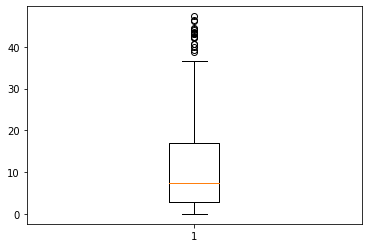

count    343.000000
mean      12.062470
std       12.011861
min        0.003802
25%        2.942325
50%        7.311432
75%       16.982943
max       47.304844
Name: Renewables (% equivalent primary energy), dtype: float64

In [17]:
#Методом среднего
df = df.dropna()
plt.boxplot(df["Renewables (% equivalent primary energy)"])
plt.show()
df["Renewables (% equivalent primary energy)"].describe()

**На Боксплоте можно заметить выбросы, но данные значения не являются критическими, так как есть страны в которых могут быть такое кол-во возобновляемых ресурсов**

In [18]:
mean = df["Renewables (% equivalent primary energy)"].mean()
std_deviation = df["Renewables (% equivalent primary energy)"].std()
threshold = 3 * std_deviation


# Идентифицируем выбросы
outliers = [x for x in df["Renewables (% equivalent primary energy)"] if abs(x - mean) > threshold]
# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print('Межквартальный размах:', df['Renewables (% equivalent primary energy)'].quantile(0.75)-df['Renewables (% equivalent primary energy)'].quantile(0.25))
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 12.062470484416911
Стандартное отклонение данных: 12.011861383807503
Межквартальный размах: 14.040617999999998
Потенциальные выбросы: []


**С помощью метода, основанном на среднем, мы не обнаружили выбросы**

In [19]:
q1 = df['Renewables (% equivalent primary energy)'].quantile(0.25)
q3 = df['Renewables (% equivalent primary energy)'].quantile(0.75)
q = q3 - q1
lower = q1 - 1.5*q
upper = q3 + 1.5*q
outliers2 = [x1 for x1 in df['Renewables (% equivalent primary energy)'] if ((x1 < lower) or (x1 > upper))]
print('Потенциальные выбросы:', outliers2)

Потенциальные выбросы: [43.288433, 39.11162, 40.756653, 42.284126, 42.286156, 43.1457, 43.045963, 44.380226, 43.366776, 46.30883, 44.246536, 43.91006, 42.06637, 39.836597, 38.852745, 40.603523, 43.5387, 43.280678, 46.080498, 47.304844]


**А вот с помощью метода, основанном на межквартальном размахе, мы обнаружили выбросы, которые видны на боксплоте**

In [20]:
df_1 = df.copy()
df_1 = df_1[df_1['Renewables (% equivalent primary energy)'] < upper]

In [21]:
df_1['Renewables (% equivalent primary energy)'].describe()

count    323.000000
mean      10.153970
std        9.501563
min        0.003802
25%        2.782079
50%        6.939361
75%       15.595280
max       36.600243
Name: Renewables (% equivalent primary energy), dtype: float64

**Мы удалили выбросы по межквартальному методу, но в нашем случае больше всего подходит метод, основанный на среднем, так как я писал выше, что выбросы на боксплоте не являются критическими.**

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [22]:
#Проверка на дубли
df_duplicated = df[df.duplicated()]
df_duplicated

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


**ДУБЛИ НЕ ОБНАРУЖЕНЫ!**

In [23]:
df = pd.concat((df, df.loc[0:100]))

In [24]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.96687,97.3,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.0,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.95306,97.8,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.6,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.93401,98.0,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.2,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.91208,98.2,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.3,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.88961,98.5,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.9,3113.094883,18,2381741.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Algeria,2015,99.18666,99.5,7.85,890000.0,0.06,64.46,0.0,0.22,...,15616.311,5.05,156270.00430,0.096813,3.7,4177.889542,18,2381741.0,28.033886,1.659626
58,Algeria,2016,99.35025,99.6,11.88,160000.0,0.08,66.43,0.0,0.34,...,15295.143,4.85,154910.00370,0.145807,3.2,3946.452447,18,2381741.0,28.033886,1.659626
59,Algeria,2017,99.63549,99.6,16.02,10000.0,0.14,70.86,0.0,0.64,...,15164.000,4.93,158339.99630,0.247018,1.3,4109.698217,18,2381741.0,28.033886,1.659626
60,Algeria,2018,99.69784,99.6,16.25,50000.0,0.19,71.32,0.0,0.78,...,15971.084,5.19,165539.99330,0.287679,1.1,4142.018558,18,2381741.0,28.033886,1.659626


**Мы добавили 101 дубль**

In [25]:
#Удаление дублей
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,...,9961.640,4.07,78650.00000,0.065218,3.000000,1740.606654,18,2381741.0,28.033886,1.659626
44,Algeria,2002,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,...,10180.350,4.12,82400.00153,0.051677,5.600000,1781.828908,18,2381741.0,28.033886,1.659626
45,Algeria,2003,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,...,10510.461,4.08,88190.00244,0.228104,7.200000,2103.381291,18,2381741.0,28.033886,1.659626
46,Algeria,2004,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,...,10759.022,3.96,89489.99786,0.206787,4.300000,2610.185422,18,2381741.0,28.033886,1.659626
47,Algeria,2005,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,...,11113.723,3.90,94190.00244,0.434119,5.900000,3113.094883,18,2381741.0,28.033886,1.659626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Uzbekistan,2015,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,...,17386.195,7.86,99169.99817,3.012993,7.218774,2753.971072,79,447400.0,41.377491,64.585262
3560,Uzbekistan,2016,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,...,16374.342,7.82,105230.00340,3.567936,5.932151,2704.677188,79,447400.0,41.377491,64.585262
3561,Uzbekistan,2017,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,...,16642.676,7.88,109529.99880,3.972285,4.395275,1916.764642,79,447400.0,41.377491,64.585262
3562,Uzbekistan,2018,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,...,16445.740,9.05,112470.00120,2.927033,5.354997,1597.068337,79,447400.0,41.377491,64.585262


**Дубли убраны**

## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [26]:
num_features = df.select_dtypes(include=['float64']).columns
num_features

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

In [27]:
df['Year'] = df['Year'].astype('category')
df['Entity'] = df['Entity'].astype('category')
df['Latitude'] = df['Latitude'].astype('category')
df['Longitude'] = df['Longitude'].astype('category')
df = df.dropna()

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
df_minmax_scaled.gdp_growth.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([0.55732409, 0.59386242, 0.61634754, 0.57559325, 0.59807838,
       0.5376496 , 0.56575601, 0.55591877, 0.56294537, 0.55451345,
       0.56856665, 0.56716133, 0.56013473, 0.53343364, 0.530623  ,
       0.52921768, 0.45320616, 0.63935321, 0.64205891, 0.63955866,
       0.62825274, 0.64175083, 0.5721816 , 0.43199024, 0.65745876,
       0.59953923, 0.50073998, 0.54896698, 0.47985418, 0.55354602,
       0.48592921, 0.55477348, 0.47838167, 0.48669361, 0.67115503,
       0.90811366, 1.        , 0.64580817, 0.58611832, 0.5165698 ,
       0.55381791, 0.53053834, 0.47159955, 0.51797512, 0.58955223,
       0.56903215, 0.58177058, 0.5887967 , 0.60701544, 0.60892612,
       0.61436041, 0.59967749, 0.58606464, 0.59346595, 0.60600971,
       0.60681187, 0.5996749 , 0.60034178, 0.60725006, 0.61513164,
       0.61753046, 0.62567541, 0.62973581, 0.57682923, 0.53469698,
       0.5580754 , 0.53119678, 0.59611043, 0.56016469, 0.57084311,
       0.60046561, 0.58675424, 0.51339642, 0.62096017, 0.57101

In [29]:
standard_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = standard_scaler.fit_transform(df[num_features])
df_std_scaled.gdp_growth.unique() # преобразованные уникальные значения в числовом призанке в диапозоне [0, 1]

array([-3.62591757e-01,  2.51616261e-01,  6.29590425e-01, -5.54877482e-02,
        3.22486416e-01, -6.93319151e-01, -2.20851445e-01, -3.86215142e-01,
       -2.68098216e-01, -4.09838528e-01, -1.73604675e-01, -1.97228060e-01,
       -3.15344986e-01, -7.64189307e-01, -8.11436077e-01, -8.35059463e-01,
       -2.11281050e+00,  1.01631488e+00,  1.06179758e+00,  1.01976841e+00,
        8.29716288e-01,  1.05661876e+00, -1.12837508e-01, -2.46944930e+00,
        1.32066850e+00,  3.47043325e-01, -1.31376857e+00, -5.03074411e-01,
       -1.66485811e+00, -4.26100907e-01, -1.56273718e+00, -4.05467498e-01,
       -1.68961097e+00, -1.54988757e+00,  1.55090233e+00,  5.53416855e+00,
        7.07877461e+00,  1.12482245e+00,  1.21438312e-01, -1.04766993e+00,
       -4.21530443e-01, -8.12859187e-01, -1.80361826e+00, -1.02404654e+00,
        1.79162090e-01, -1.65779679e-01,  4.83529520e-02,  1.66461731e-01,
        4.72718140e-01,  5.04836504e-01,  5.96186806e-01,  3.49367410e-01,
        1.20535953e-01,  

In [30]:
df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled[num_features] = df_std_scaled[num_features]
df_scaled

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
43,Algeria,2001,0.689755,0.954100,-0.863462,-0.446636,-1.276856,-0.321419,-0.302187,-0.370672,...,-0.290397,-0.267660,-0.311619,-0.957485,-0.362592,-0.849389,18,0.135944,0.687643,-0.226397
44,Algeria,2002,0.688704,0.971736,-0.864357,-0.447952,-1.272365,-0.320167,-0.302187,-0.370712,...,-0.267412,-0.250516,-0.309577,-0.958615,0.251616,-0.836150,18,0.135944,0.687643,-0.226397
45,Algeria,2003,0.687254,0.978791,-0.865252,-0.448531,-1.274611,-0.318123,-0.302187,-0.369912,...,-0.232719,-0.264231,-0.306424,-0.943885,0.629590,-0.732881,18,0.135944,0.687643,-0.226397
46,Algeria,2004,0.685584,0.985845,-0.866147,-0.448400,-1.276295,-0.316079,-0.302187,-0.369952,...,-0.206597,-0.305377,-0.305716,-0.945665,-0.055488,-0.570117,18,0.135944,0.687643,-0.226397
47,Algeria,2005,0.683874,0.996427,-0.867123,-0.448347,-1.268436,-0.313243,-0.302187,-0.368752,...,-0.169319,-0.325950,-0.303156,-0.926685,0.322486,-0.408604,18,0.135944,0.687643,-0.226397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Algeria,2015,0.706488,1.031699,-0.871109,-0.446426,-1.297626,-0.270956,-0.302187,-0.370072,...,0.303880,0.068367,-0.269347,-0.954847,-0.197228,-0.066637,18,0.135944,0.687643,-0.226397
58,Algeria,2016,0.718942,1.035226,-0.838326,-0.448347,-1.296503,-0.268440,-0.302187,-0.369592,...,0.270126,-0.000210,-0.270087,-0.950756,-0.315345,-0.140965,18,0.135944,0.687643,-0.226397
59,Algeria,2017,0.740658,1.035226,-0.804647,-0.448742,-1.293135,-0.262780,-0.302187,-0.368392,...,0.256344,0.027221,-0.268219,-0.942306,-0.764189,-0.088537,18,0.135944,0.687643,-0.226397
60,Algeria,2018,0.745405,1.035226,-0.802776,-0.448637,-1.290329,-0.262193,-0.302187,-0.367831,...,0.341164,0.116371,-0.264298,-0.938911,-0.811436,-0.078157,18,0.135944,0.687643,-0.226397


Масштабируйте категориальные признаки через OneHotEncoder

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359 entries, 43 to 61
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype   
---  ------                                                            --------------  -----   
 0   Entity                                                            359 non-null    category
 1   Year                                                              359 non-null    category
 2   Access to electricity (% of population)                           359 non-null    float64 
 3   Access to clean fuels for cooking                                 359 non-null    float64 
 4   Renewable-electricity-generating-capacity-per-capita              359 non-null    float64 
 5   Financial flows to developing countries (US $)                    359 non-null    float64 
 6   Renewable energy share in the total final energy consumption (%)  359 non-null    float64 
 7   Electricity from fossil fuels (

In [32]:
cat_features = df.select_dtypes(include=['category']).columns
df_cat_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Удаление исходных категориальных признаков
cat_features

Index(['Entity', 'Year', 'Latitude', 'Longitude'], dtype='object')

In [36]:

from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[cat_features])

# Получаем имена новых признаков
encoded_columns = encoder.get_feature_names_out(cat_features)
encoded_columns

TypeError: __init__() got an unexpected keyword argument 'sparse'

In [ ]:
# Добавляем новые закодированные признаки в копию датафрейма
df_encoded = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

df_copy = df.copy()
df_copy = pd.concat([df_copy, df_encoded], axis=1)

# Удаление исходных категориальных признаков
df_copy = df_copy.drop(columns=cat_features)
df_copy

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Longitude_47.576927,Longitude_59.556278,Longitude_64.585262,Longitude_69.345116,Longitude_78.96288,Longitude_80.771797,Longitude_90.356331,Longitude_100.992541,Longitude_104.195397,Longitude_121.774017
43,98.96687,97.30,8.79,810000.0,0.43,24.96,0.0,0.07,0.279664,9961.640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,98.95306,97.80,8.68,310000.0,0.51,25.94,0.0,0.06,0.230769,10180.350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,98.93401,98.00,8.57,90000.0,0.47,27.54,0.0,0.26,0.935252,10510.461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,98.91208,98.20,8.46,140000.0,0.44,29.14,0.0,0.25,0.850630,10759.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,98.88961,98.50,8.34,160000.0,0.58,31.36,0.0,0.55,1.723598,11113.723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,100.00000,85.35,60.83,270000.0,1.71,47.55,0.0,7.00,12.832264,17386.195,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3560,100.00000,85.20,59.88,690000.0,1.61,48.75,0.0,7.25,12.946428,16374.342,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3561,100.00000,84.90,58.24,60130000.0,1.75,49.71,0.0,8.35,14.381675,16642.676,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3562,100.00000,84.30,59.09,84130000.0,1.49,53.58,0.0,5.85,9.843514,16445.740,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Задание для гениев*


Реализовать расчет корреляции Спирмана